In [1]:
import pandas as pd
import numpy as np

In [10]:
df = pd.read_csv('Titanic dataset.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [9]:
df.shape

(418, 12)

In [ ]:
#The first thing is to look at the data carefully and figure out what values are missiing.

In [8]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [13]:
print('Total number of missing values are',df.isnull().sum().sum())

Total number of missing values are 414


In [14]:
#Here we get to know that the 'Age' and 'Cabin' parameters contains the most missing values

#There are two ways in which we can handle these missing values
#1. Deleting the missing values
#2. Imputin them
# So if the type of missing values is 'MCAR' or 'MAR' then we can think of deleting these missing values. But still not recommendable.
#Better put something in place of these values.

In [17]:
#Deleting row wise
train_df = df.dropna(axis = 0)
train_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [18]:
#Deleting column wise
train_df = df.dropna(axis = 1)
train_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
SibSp          0
Parch          0
Ticket         0
Embarked       0
dtype: int64

In [19]:
train_df.shape# originally shape = (418, 12) # not at all recommendable #delete only if the column has maximum missing values

(418, 9)

In [20]:
#imputing missing values

In [22]:
#1. Replacing with Arbitrary values
arbit_df = df.fillna(0)

In [23]:
arbit_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [27]:
#filling some specific column
arbit_df_1['Age'] = df['Age'].fillna(0) 

In [31]:
#replacing with mean
df['Age'].fillna(df['Age'].mean())

0      34.50000
1      47.00000
2      62.00000
3      27.00000
4      22.00000
         ...   
413    30.27259
414    39.00000
415    38.50000
416    30.27259
417    30.27259
Name: Age, Length: 418, dtype: float64

In [35]:
#replacing with mode
df['Age'].fillna(df['Age'].mode()[0])

0      34.5
1      47.0
2      62.0
3      27.0
4      22.0
       ... 
413    21.0
414    39.0
415    38.5
416    21.0
417    21.0
Name: Age, Length: 418, dtype: float64

In [34]:
#replacing with median
df['Age'].fillna(df['Age'].median())

0      34.5
1      47.0
2      62.0
3      27.0
4      22.0
       ... 
413    27.0
414    39.0
415    38.5
416    27.0
417    27.0
Name: Age, Length: 418, dtype: float64

In [37]:
#replacing with previous value. Sometimes it is better to replace with forward or back ward values than replacin it with mean median and mode
df.fillna(method = 'ffill')# but better to use this method in time series data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,28.0,0,0,A.5. 3236,8.0500,C78,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,C105,S
416,1308,0,3,"Ware, Mr. Frederick",male,38.5,0,0,359309,8.0500,C105,S


In [ ]:
#replacing with interpolation
#it takes the average of previous and last value take their mean and fill it in place of missing data.

In [39]:
df.interpolate()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,33.5,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,38.5,0,0,359309,8.0500,NaN,S


In [41]:
#imputing methods for categorial data
from sklearn.impute import SimpleImputer 

In [43]:
imputer = SimpleImputer(strategy = 'most_frequent')

In [45]:
imputer.fit_transform(df)# here after looking at the data, we observe that all 300+ people can't stay in the same cabin obviously. so not recommendable here.

array([[892, 0, 3, ..., 7.8292, 'B57 B59 B63 B66', 'Q'],
       [893, 1, 3, ..., 7.0, 'B57 B59 B63 B66', 'S'],
       [894, 0, 2, ..., 9.6875, 'B57 B59 B63 B66', 'Q'],
       ...,
       [1307, 0, 3, ..., 7.25, 'B57 B59 B63 B66', 'S'],
       [1308, 0, 3, ..., 8.05, 'B57 B59 B63 B66', 'S'],
       [1309, 0, 3, ..., 22.3583, 'B57 B59 B63 B66', 'C']], dtype=object)

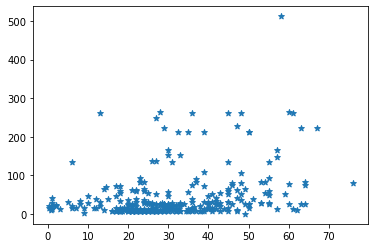

In [53]:
import matplotlib.pyplot as plt
plt.scatter(df['Age'],df['Fare'],marker='*')